In [89]:
# Author    : Jared Frazier
# Student ID: 14322234
# Course    : Seminars in Computational Science
# Date      : 2022-10-13
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
plt.style.use('seaborn-v0_8-paper')

In [31]:
# Load data
df = pd.read_csv('istherecorrelation.csv', sep=';')
display(df.head())
display(df.describe())

,Year,WO [x1000],NL Beer consumption [x1000 hectoliter]
0,2006,"205,9",11402
1,2007,"208,6",11492
2,2008,"212,7",11450
3,2009,"220,5",11502
4,2010,"233,2",11474


,Year,NL Beer consumption [x1000 hectoliter]
count,13.00000,13.000000
mean,2012.00000,11579.461538
std,3.89444,189.661811
min,2006.00000,11402.000000
25%,2009.00000,11474.000000
50%,2012.00000,11492.000000
75%,2015.00000,11601.000000
max,2018.00000,12048.000000


In [99]:
# Raw calculations to allow for equations on graph
x = df['Year']
y = df['NL Beer consumption [x1000 hectoliter]']

# Polynomial values for main data only
# Used to estimate plot values
# NOTE: `np.polyfit` is called under the hood
# by `sns.regplot` 
# (see https://github.com/mwaskom/seaborn/blob/master/seaborn/regression.py)
p_coeffs = np.polyfit(x, y, 3)
polynomial = rf'$y={p_coeffs[0]:.1f}x^{3}{p_coeffs[1]:.1f}x^{2}+{p_coeffs[2]:.1f}x{p_coeffs[3]:.1f}$'

def polynomial_pred(x, coeffs):
    """Define polynomial prediction using (fitted) coefficients."""
    return coeffs[0]*x**3 + coeffs[1]*x**2 + coeffs[2]*x + coeffs[3]

# Linear coefficients
X, y = np.c_[np.ones(len(x)), x], y
lin_coeffs = np.flip(np.linalg.pinv(X).dot(y))  # flip to [ax, b] coeff order
linear = rf'$y={lin_coeffs[0]:.1f}x{lin_coeffs[1]:.1f}$'

def linear_pred(x, coeffs):
    """Define linear prediction using (fitted) coefficients."""
    return coeffs[0] * x + coeffs[1]

# Compute R2
linear_r2 = r2_score(y, linear_pred(x, coeffs=lin_coeffs))
polynomial_r2 = r2_score(y, polynomial_pred(x, coeffs=p_coeffs))

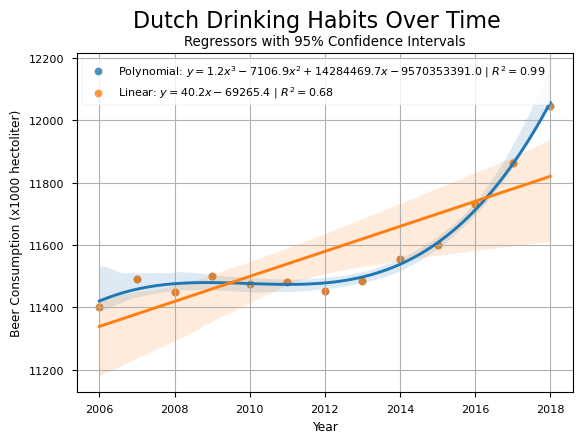

In [102]:
# Plot
fig, ax = plt.subplots()
sns.regplot(
    x='Year', 
    y='NL Beer consumption [x1000 hectoliter]', 
    data=df,
    ax=ax,
    order=3,
    label=rf'Polynomial: {polynomial} | $R^{2}={polynomial_r2:.2f}$') 

sns.regplot(
    x='Year', 
    y='NL Beer consumption [x1000 hectoliter]', 
    data=df,
    ax=ax,
    order=1,
    label=rf'Linear: {linear} | $R^{2}={linear_r2:.2f}$',)

fig.suptitle('Dutch Drinking Habits Over Time', fontsize=16)
ax.title.set_text('Regressors with 95% Confidence Intervals')
ax.set_ylabel('Beer Consumption (x1000 hectoliter)')
ax.grid()
ax.legend(loc='upper left')


# https://matplotlib.org/stable/gallery/text_labels_and_annotations/tex_demo.html
# eq = rf'$y={coeffs[0]:.1f}x^{3}{coeffs[1]:.1f}x^{2}+{coeffs[2]:.1f}x{coeffs[3]:.1f}$'
# ax.text(2006, 12100, eq, bbox=dict(boxstyle="round", fc="white", ec="black", pad=0.2))

fig.savefig('correlation.PNG', dpi=300)